In [14]:
from SloppyCell.ReactionNetworks import *
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import conditions as cnd
%matplotlib inline

In [40]:
reload(cnd)

<module 'conditions' from 'conditions.py'>

In [2]:
## load full network and set dynamic vars
net_full = IO.from_SBML_file('../model/model.xml', id='net_full')
dyn_vars =  ['paurb', 'pmelt_bub1','pmelt_bub1_pp2a', 'pmelt', 'rvsf', 'rvsf_pp1']
nonvars = list(set(net_full.dynamicVars.keys()) - set(dyn_vars))
for key in nonvars:
    net_full.set_var_constant(key, is_constant=True)
    net_full.set_var_optimizable(key, is_optimizable=False)
for var in ['pp1_tot', 'bub1_tot', 'pp2a_tot', 'kln1_tot', 'aurb_tot']:
    net_full.set_var_optimizable(var, False)

In [21]:
## generate all possible models
## ids are strings of 1/0 indicating presence/absence of reactions
phospho_pars = [
    ['kdp_rvsf_pp1', 'kdp_rvsf_pp2a'],
     ['kp_aurb_bub1','kp_aurb_aurb'],
     ['kdp_aurb_pp1','kdp_aurb_pp2a']]
nets = {}
alf = ['01','10','11']
net_iterator = it.product(alf,repeat=3)
for n_i in net_iterator:
    id = ''.join(n_i)
    net_it = net_full.copy(new_id='net_'+id)
    for i in range(len(n_i)):
        pars = phospho_pars[i]
        for j in range(len(n_i[i])):
            val = float(n_i[i][j])
            net_it.set_var_ic(pars[j], val)
            net_it.set_var_optimizable(pars[j], bool(val))
    nets[id] = net_it

In [22]:
wirings = dict()
for id, net in nets.items():
    wiring = cnd.wiring(net, id)
    for m,m_data in cnd.data.items():
        for i,data in m_data.items():
            wiring.add_condition(cnd.mutants[m], cnd.interventions[i], data, cnd.sf[m][i])
    wirings[id] = wiring
    

In [44]:
w = wirings['111111']
w.nets.keys()

['wt_mps1',
 'wt_ic',
 'wt_both',
 'dkard_ic',
 'wt_aurb',
 'dkard_aurb',
 'dkard_both']

In [ ]:
for id, w in wirings.items():
    w.add_opt(w.nets.keys(), 'all')
    w.opt['all'].run()

running build_ext
running build_src
build_src
building extension "dkard_both_0_serge_17_5098523151_15072" sources
f2py options: []
f2py: dkard_both_0_serge_17_5098523151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_both_0_serge_17_5098523151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_both_0_serge_17_5098523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modul

running build_ext
running build_src
build_src
building extension "dkard_aurb_0_serge_0_8098523151_15072" sources
f2py options: []
f2py: dkard_aurb_0_serge_0_8098523151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_aurb_0_serge_0_8098523151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_aurb_0_serge_0_8098523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modules..

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_aurb_0_serge_0_8098523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_aurb_0_serge_0_8098523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared 

running build_ext
running build_src
build_src
building extension "wt_both_0_serge_93_2198523151_15072" sources
f2py options: []
f2py: wt_both_0_serge_93_2198523151_15072.pyf
Reading fortran codes...
	Reading file 'wt_both_0_serge_93_2198523151_15072.pyf' (format:free)
Post-processing...
	Block: wt_both_0_serge_93_2198523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_sto

running build_ext
running build_src
build_src
building extension "wt_mps1_0_serge_5_4198523151_15072" sources
f2py options: []
f2py: wt_mps1_0_serge_5_4198523151_15072.pyf
Reading fortran codes...
	Reading file 'wt_mps1_0_serge_5_4198523151_15072.pyf' (format:free)
Post-processing...
	Block: wt_mps1_0_serge_5_4198523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochas

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_mps1_0_serge_5_4198523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_mps1_0_serge_5_4198523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /ho

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_both_0_serge_53_0998523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_both_0_serge_53_0998523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_aurb_0_serge_13_2998523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_aurb_0_serge_13_2998523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_both_0_serge_85_6998523151_15072" sources
f2py options: []
f2py: wt_both_0_serge_85_6998523151_15072.pyf
Reading fortran codes...
	Reading file 'wt_both_0_serge_85_6998523151_15072.pyf' (format:free)
Post-processing...
	Block: wt_both_0_serge_85_6998523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processin

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_both_0_serge_85_6998523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_both_0_serge_85_6998523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_mps1_0_serge_36_8998523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_mps1_0_serge_36_8998523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

running build_ext
running build_src
build_src
building extension "dkard_aurb_0_serge_51_4019523151_15072" sources
f2py options: []
f2py: dkard_aurb_0_serge_51_4019523151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_aurb_0_serge_51_4019523151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_aurb_0_serge_51_4019523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_bub1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building module

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_aurb_0_serge_51_4019523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_aurb_0_serge_51_4019523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_both_0_serge_94_8019523151_15072" sources
f2py options: []
f2py: wt_both_0_serge_94_8019523151_15072.pyf
Reading fortran codes...
	Reading file 'wt_both_0_serge_94_8019523151_15072.pyf' (format:free)
Post-processing...
	Block: wt_both_0_serge_94_8019523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_bub1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stoc

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_both_0_serge_94_8019523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_both_0_serge_94_8019523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_mps1_0_serge_28_0119523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_mps1_0_serge_28_0119523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_both_0_serge_84_3539523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_both_0_serge_84_3539523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_aurb_0_serge_36_5539523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_aurb_0_serge_36_5539523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_both_0_serge_40_0639523151_15072" sources
f2py options: []
f2py: wt_both_0_serge_40_0639523151_15072.pyf
Reading fortran codes...
	Reading file 'wt_both_0_serge_40_0639523151_15072.pyf' (format:free)
Post-processing...
	Block: wt_both_0_serge_40_0639523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_bub1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_both_0_serge_40_0639523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_both_0_serge_40_0639523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

running build_ext
running build_src
build_src
building extension "dkard_both_0_serge_63_7169523151_15072" sources
f2py options: []
f2py: dkard_both_0_serge_63_7169523151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_both_0_serge_63_7169523151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_both_0_serge_63_7169523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modul

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_both_0_serge_63_7169523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_both_0_serge_63_7169523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_aurb_0_serge_34_1269523151_15072" sources
f2py options: []
f2py: wt_aurb_0_serge_34_1269523151_15072.pyf
Reading fortran codes...
	Reading file 'wt_aurb_0_serge_34_1269523151_15072.pyf' (format:free)
Post-processing...
	Block: wt_aurb_0_serge_34_1269523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_sto

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_aurb_0_serge_34_1269523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_aurb_0_serge_34_1269523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_both_0_serge_56_3269523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_both_0_serge_56_3269523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

running build_ext
running build_src
build_src
building extension "dkard_both_0_serge_24_5689523151_15072" sources
f2py options: []
f2py: dkard_both_0_serge_24_5689523151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_both_0_serge_24_5689523151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_both_0_serge_24_5689523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modules...
	Building module "dkard_

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_both_0_serge_24_5689523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_both_0_serge_24_5689523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_aurb_0_serge_35_9689523151_15072" sources
f2py options: []
f2py: wt_aurb_0_serge_35_9689523151_15072.pyf
Reading fortran codes...
	Reading file 'wt_aurb_0_serge_35_9689523151_15072.pyf' (format:free)
Post-processing...
	Block: wt_aurb_0_serge_35_9689523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_aurb_0_serge_35_9689523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_aurb_0_serge_35_9689523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

running build_ext
running build_src
build_src
building extension "wt_mps1_0_serge_19_3789523151_15072" sources
f2py options: []
f2py: wt_mps1_0_serge_19_3789523151_15072.pyf
Reading fortran codes...
	Reading file 'wt_mps1_0_serge_19_3789523151_15072.pyf' (format:free)
Post-processing...
	Block: wt_mps1_0_serge_19_3789523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_mps1_0_serge_19_3789523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_mps1_0_serge_19_3789523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_both_0_serge_94_9989523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_both_0_serge_94_9989523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_aurb_0_serge_76_3099523151_15072" sources
f2py options: []
f2py: wt_aurb_0_serge_76_3099523151_15072.pyf
Reading fortran codes...
	Reading file 'wt_aurb_0_serge_76_3099523151_15072.pyf' (format:free)
Post-processing...
	Block: wt_aurb_0_serge_76_3099523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing

running build_ext
running build_src
build_src
building extension "wt_both_0_serge_77_5099523151_15072" sources
f2py options: []
f2py: wt_both_0_serge_77_5099523151_15072.pyf
Reading fortran codes...
	Reading file 'wt_both_0_serge_77_5099523151_15072.pyf' (format:free)
Post-processing...
	Block: wt_both_0_serge_77_5099523151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_both_0_serge_77_5099523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_both_0_serge_77_5099523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_mps1_0_serge_28_7099523151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_mps1_0_serge_28_7099523151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_both_0_serge_16_1810623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_both_0_serge_16_1810623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_aurb_0_serge_59_3810623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_aurb_0_serge_59_3810623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_both_0_serge_33_8810623151_15072" sources
f2py options: []
f2py: wt_both_0_serge_33_8810623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_both_0_serge_33_8810623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_both_0_serge_33_8810623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_

running build_ext
running build_src
build_src
building extension "wt_mps1_0_serge_86_0910623151_15072" sources
f2py options: []
f2py: wt_mps1_0_serge_86_0910623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_mps1_0_serge_86_0910623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_mps1_0_serge_86_0910623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_mps1_0_serge_86_0910623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_mps1_0_serge_86_0910623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_both_0_serge_74_1050623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_both_0_serge_74_1050623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_aurb_0_serge_9_5050623151_15072" sources
f2py options: []
f2py: wt_aurb_0_serge_9_5050623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_aurb_0_serge_9_5050623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_aurb_0_serge_9_5050623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochasti

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_aurb_0_serge_9_5050623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_aurb_0_serge_9_5050623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /ho

running build_ext
running build_src
build_src
building extension "wt_mps1_0_serge_12_0150623151_15072" sources
f2py options: []
f2py: wt_mps1_0_serge_12_0150623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_mps1_0_serge_12_0150623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_mps1_0_serge_12_0150623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stoch

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_mps1_0_serge_12_0150623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_mps1_0_serge_12_0150623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

running build_ext
running build_src
build_src
building extension "dkard_aurb_0_serge_90_0280623151_15072" sources
f2py options: []
f2py: dkard_aurb_0_serge_90_0280623151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_aurb_0_serge_90_0280623151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_aurb_0_serge_90_0280623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing

running build_ext
running build_src
build_src
building extension "wt_aurb_0_serge_71_2280623151_15072" sources
f2py options: []
f2py: wt_aurb_0_serge_71_2280623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_aurb_0_serge_71_2280623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_aurb_0_serge_71_2280623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_l

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_aurb_0_serge_71_2280623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_aurb_0_serge_71_2280623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_both_0_serge_53_4280623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_both_0_serge_53_4280623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

running build_ext
running build_src
build_src
building extension "dkard_both_0_serge_94_5390623151_15072" sources
f2py options: []
f2py: dkard_both_0_serge_94_5390623151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_both_0_serge_94_5390623151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_both_0_serge_94_5390623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modul

running build_ext
running build_src
build_src
building extension "dkard_aurb_0_serge_94_7390623151_15072" sources
f2py options: []
f2py: dkard_aurb_0_serge_94_7390623151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_aurb_0_serge_94_7390623151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_aurb_0_serge_94_7390623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modul

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_aurb_0_serge_94_7390623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_aurb_0_serge_94_7390623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_aurb_0_serge_46_9390623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_aurb_0_serge_46_9390623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

running build_ext
running build_src
build_src
building extension "wt_mps1_0_serge_22_4490623151_15072" sources
f2py options: []
f2py: wt_mps1_0_serge_22_4490623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_mps1_0_serge_22_4490623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_mps1_0_serge_22_4490623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_sto

running build_ext
running build_src
build_src
building extension "dkard_both_0_serge_72_5601623151_15072" sources
f2py options: []
f2py: dkard_both_0_serge_72_5601623151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_both_0_serge_72_5601623151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_both_0_serge_72_5601623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building module

running build_ext
running build_src
build_src
building extension "dkard_aurb_0_serge_53_7601623151_15072" sources
f2py options: []
f2py: dkard_aurb_0_serge_53_7601623151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_aurb_0_serge_53_7601623151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_aurb_0_serge_53_7601623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building module

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_aurb_0_serge_53_7601623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_aurb_0_serge_53_7601623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_both_0_serge_56_1701623151_15072" sources
f2py options: []
f2py: wt_both_0_serge_56_1701623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_both_0_serge_56_1701623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_both_0_serge_56_1701623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stoc

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_both_0_serge_56_1701623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_both_0_serge_56_1701623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_mps1_0_serge_89_3701623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_mps1_0_serge_89_3701623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_both_0_serge_72_5931623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_both_0_serge_72_5931623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_aurb_0_serge_24_7931623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_aurb_0_serge_24_7931623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_aurb_0_serge_45_9931623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_aurb_0_serge_45_9931623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_both_0_serge_97_1041623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_both_0_serge_97_1041623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

running build_ext
running build_src
build_src
building extension "dkard_both_0_serge_43_8071623151_15072" sources
f2py options: []
f2py: dkard_both_0_serge_43_8071623151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_both_0_serge_43_8071623151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_both_0_serge_43_8071623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modul

running build_ext
running build_src
build_src
building extension "dkard_aurb_0_serge_64_0171623151_15072" sources
f2py options: []
f2py: dkard_aurb_0_serge_64_0171623151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_aurb_0_serge_64_0171623151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_aurb_0_serge_64_0171623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modul

running build_ext
running build_src
build_src
building extension "wt_aurb_0_serge_45_2171623151_15072" sources
f2py options: []
f2py: wt_aurb_0_serge_45_2171623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_aurb_0_serge_45_2171623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_aurb_0_serge_45_2171623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_sto

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_aurb_0_serge_45_2171623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_aurb_0_serge_45_2171623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_both_0_serge_7_4171623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_both_0_serge_7_4171623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /ho

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_mps1_0_serge_68_6171623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_mps1_0_serge_68_6171623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

running build_ext
running build_src
build_src
building extension "dkard_aurb_0_serge_29_8202623151_15072" sources
f2py options: []
f2py: dkard_aurb_0_serge_29_8202623151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_aurb_0_serge_29_8202623151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_aurb_0_serge_29_8202623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modules...
	Building module "dkard_

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_aurb_0_serge_29_8202623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_aurb_0_serge_29_8202623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_both_0_serge_90_3302623151_15072" sources
f2py options: []
f2py: wt_both_0_serge_90_3302623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_both_0_serge_90_3302623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_both_0_serge_90_3302623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing

running build_ext
running build_src
build_src
building extension "wt_mps1_0_serge_81_5302623151_15072" sources
f2py options: []
f2py: wt_mps1_0_serge_81_5302623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_mps1_0_serge_81_5302623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_mps1_0_serge_81_5302623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing

running build_ext
running build_src
build_src
building extension "dkard_both_0_serge_54_3912623151_15072" sources
f2py options: []
f2py: dkard_both_0_serge_54_3912623151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_both_0_serge_54_3912623151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_both_0_serge_54_3912623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building module

running build_ext
running build_src
build_src
building extension "dkard_aurb_0_serge_25_5912623151_15072" sources
f2py options: []
f2py: dkard_aurb_0_serge_25_5912623151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_aurb_0_serge_25_5912623151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_aurb_0_serge_25_5912623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building module

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_aurb_0_serge_25_5912623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_aurb_0_serge_25_5912623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_both_0_serge_99_9912623151_15072" sources
f2py options: []
f2py: wt_both_0_serge_99_9912623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_both_0_serge_99_9912623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_both_0_serge_99_9912623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stoc

running build_ext
running build_src
build_src
building extension "wt_mps1_0_serge_71_2022623151_15072" sources
f2py options: []
f2py: wt_mps1_0_serge_71_2022623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_mps1_0_serge_71_2022623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_mps1_0_serge_71_2022623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stoc

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_mps1_0_serge_71_2022623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_mps1_0_serge_71_2022623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_both_0_serge_47_3622623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_both_0_serge_47_3622623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_aurb_0_serge_61_8622623151_15072" sources
f2py options: []
f2py: wt_aurb_0_serge_61_8622623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_aurb_0_serge_61_8622623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_aurb_0_serge_61_8622623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkdp_rvsf_pp1
			Block: dres_dkp_aurb_aurb
			Block: dres_dkdp_aurb_pp1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_aurb_0_serge_61_8622623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_aurb_0_serge_61_8622623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_both_0_serge_65_0722623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_both_0_serge_65_0722623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_mps1_0_serge_98_2722623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_mps1_0_serge_98_2722623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

running build_ext
running build_src
build_src
building extension "dkard_aurb_0_serge_27_5262623151_15072" sources
f2py options: []
f2py: dkard_aurb_0_serge_27_5262623151_15072.pyf
Reading fortran codes...
	Reading file 'dkard_aurb_0_serge_27_5262623151_15072.pyf' (format:free)
Post-processing...
	Block: dkard_aurb_0_serge_27_5262623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modules...
	Building module "dkard

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from dkard_aurb_0_serge_27_5262623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
dkard_aurb_0_serge_27_5262623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -share

running build_ext
running build_src
build_src
building extension "wt_both_0_serge_79_9262623151_15072" sources
f2py options: []
f2py: wt_both_0_serge_79_9262623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_both_0_serge_79_9262623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_both_0_serge_79_9262623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processin

running build_ext
running build_src
build_src
building extension "wt_mps1_0_serge_21_2362623151_15072" sources
f2py options: []
f2py: wt_mps1_0_serge_21_2362623151_15072.pyf
Reading fortran codes...
	Reading file 'wt_mps1_0_serge_21_2362623151_15072.pyf' (format:free)
Post-processing...
	Block: wt_mps1_0_serge_21_2362623151_15072
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dkb_rvsf_pp1
			Block: dres_dkd_rvsf_pp1
			Block: dres_dkb_pmelt_bub1
			Block: dres_dkd_pmelt_bub1
			Block: dres_dkb_pmelt_bub1_pp2a
			Block: dres_dkd_pmelt_bub1_pp2a
			Block: dres_dkp_melt
			Block: dres_dkdp_melt
			Block: dres_dkp_rvsf
			Block: dres_dkdp_rvsf_pp2a
			Block: dres_dkp_aurb_bub1
			Block: dres_dkdp_aurb_pp2a
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processin

In file included from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from build/src.linux-x86_64-2.7/./fortranobject.h:13,
                 from wt_mps1_0_serge_21_2362623151_15072module.c:19:
/home/fridoling/anaconda2/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
wt_mps1_0_serge_21_2362623151_15072module.c:105:12: warning: ‘f2py_size’ defined but not used [-Wunused-function]
 static int f2py_size(PyArrayObject* var, ...)
            ^
gcc -pthread -shared -B /

[Text(0,0,u'(110111)'),
 Text(0,0,u'(111010)'),
 Text(0,0,u'(111011)'),
 Text(0,0,u'(110110)'),
 Text(0,0,u'(111110)'),
 Text(0,0,u'(111111)'),
 Text(0,0,u'(010111)'),
 Text(0,0,u'(011011)'),
 Text(0,0,u'(011010)'),
 Text(0,0,u'(011001)'),
 Text(0,0,u'(010110)'),
 Text(0,0,u'(011111)'),
 Text(0,0,u'(011110)'),
 Text(0,0,u'(010101)'),
 Text(0,0,u'(011101)'),
 Text(0,0,u'(100110)'),
 Text(0,0,u'(100111)'),
 Text(0,0,u'(101010)'),
 Text(0,0,u'(101110)'),
 Text(0,0,u'(101001)'),
 Text(0,0,u'(111001)'),
 Text(0,0,u'(111101)'),
 Text(0,0,u'(110101)'),
 Text(0,0,u'(101011)'),
 Text(0,0,u'(101111)'),
 Text(0,0,u'(101101)'),
 Text(0,0,u'(100101)')]

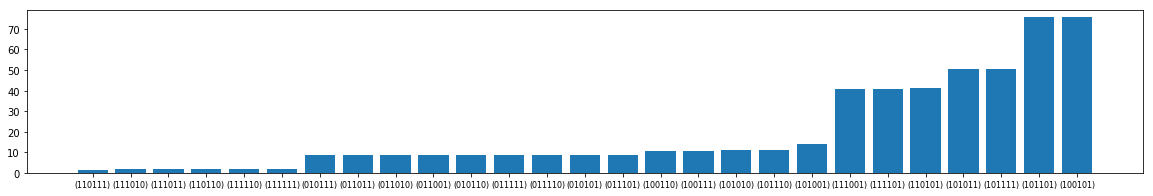

In [39]:
costs = {}
for id, w in wirings.items():
    costs[id] = w.opt['test_ic'].cost_opt
fig, ax = plt.subplots(1,1,figsize=(20,3))  
ax.bar(range(len(costs)), sorted(costs.values()))
ax.set_xticks(range(len(costs)))
labels = list(sorted(costs, key=costs.get))
labels = ['('+id+')' for id in labels]
ax.set_xticklabels(labels,fontdict={'fontsize':8})

In [19]:
net_wt = w.nets['wt_ic'].copy('wt')
net_dkard = w.nets['dkard_ic'].copy('dkard')
traj_wt = Dynamics.integrate(net_wt, [0,1200], params = w.opt['test_ic'].params_opt)
traj_dkard = Dynamics.integrate(net_dkard, [0,1200], params = w.opt['test_ic'].params_opt)

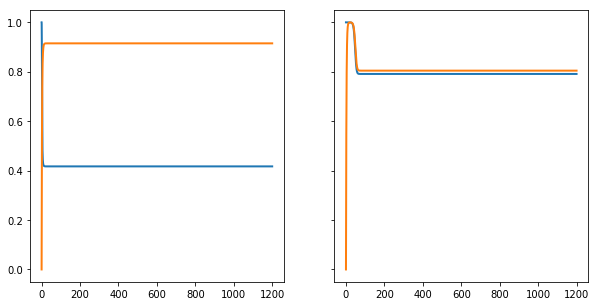

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5),sharey=True)
ax1.plot(traj_wt.timepoints, traj_wt.get_var_traj('prvsf'))
ax1.plot(traj_wt.timepoints, traj_wt.get_var_traj('pmelt_tot'))
ax2.plot(traj_dkard.timepoints, traj_dkard.get_var_traj('prvsf'))
ax2.plot(traj_dkard.timepoints, traj_dkard.get_var_traj('pmelt_tot'))

In [589]:
reload(cnd)

<module 'conditions' from 'conditions.py'>